# LIQA Transcript Quantification Results Analysis Part 4

This notebook focuses on visualization of the novel and annotated transcript quantification data. 

## Part 1: Import Data and Configure Python Libraries

In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec
%matplotlib inline
import seaborn as sns
import re
from IPython.display import display
from matplotlib.pyplot import gcf
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from PIL import ImageColor
from matplotlib.patches import Patch #for custom legend making
import scipy.spatial as sp, scipy.cluster.hierarchy as hc #for faster computing of hierarchial clusters

In [2]:
#pd.options.display.max_columns = None #display all columns in dataframe
#pd.options.display.max_rows = None

In [3]:
#pd.options.display.max_colwidth = 100 #show the full content of long strings

### Import Data

In [2]:
os.getcwd()

'C:\\Users\\15082\\OneDrive\\Desktop\\thesis_research\\gtex_v9_data_analysis\\LIQA\\work_in_progress'

In [8]:
data_dir = 'gtex_v9_data\\data_for_analysis\\my_liqa_data'

In [9]:
novel_transcript_quant_clean_path = os.path.join(data_dir, 
                                                      'liqa_novel_transcript_quant_clean.csv')
annotated_transcript_quant_clean_path = os.path.join(data_dir, 
                                                      'liqa_annotated_transcript_quant_clean.csv')

#### Read data into pandas dataframe

In [10]:
# change working directory
os.chdir('C:\\Users\\15082\\OneDrive\\Desktop\\thesis_research')

In [11]:
novel_transcript_express_tissue_clean = pd.read_csv(novel_transcript_quant_clean_path)
annotated_transcript_express_tissue_clean = pd.read_csv(annotated_transcript_quant_clean_path)

In [12]:
novel_transcript_express_tissue_clean.head(3)

,Unnamed: 0,sample_id,tissue,130750ff-7bd5-42fc-9951-2ee00e4c4253_ENSG00000204540.10_ENSG00000204540.10,0d6ef114-5d3f-4df1-a18b-02c128c21368_ENSG00000204540.10_ENSG00000204540.10,e692f135-46a2-4cf8-953c-c0c636810214_ENSG00000204540.10_ENSG00000204540.10,73af7ae0-6dc4-4d06-8132-8e644cb837f4_ENSG00000204540.10_ENSG00000204540.10,7d8b36a5-f3cf-440a-b63e-7c020aa740e8_ENSG00000065665.20_ENSG00000065665.20,5bbbf8aa-951c-47d6-9ec3-744348d39a6a-1_ENSG00000065665.20_ENSG00000065665.20,444373bd-bde4-473c-8bcd-a797e9e67d05_ENSG00000065665.20_ENSG00000065665.20,...,263a46b0-25e6-4c87-aefc-fc46c060d2c5_ENSG00000163938.16_ENSG00000163938.16,0863c39a-d70c-441c-9c17-da9213b0c898_ENSG00000163938.16_ENSG00000163938.16,8cae0922-74c0-4b44-b57f-bad8a387b9ac_ENSG00000163938.16,1f1d9c64-7ace-4a58-a50c-05a0a415533e_ENSG00000163938.16_ENSG00000163938.16,07f25262-3f4a-4ba6-bcfc-d82a7c3351f7_ENSG00000163938.16,3f2ac28b-a3c1-4237-a27d-8fe5ad946e11_ENSG00000174231.16,74a320c6-b08c-48ab-b21f-fee3ad71669f_ENSG00000174231.16_ENSG00000174231.16,dc0b68a1-95fe-4962-8993-51bf0f30da17_ENSG00000174231.16_ENSG00000174231.16,e878980f-9ef6-4ad5-b3f8-47dbb38fd9de_ENSG00000174231.16_ENSG00000174231.16,5d80bee1-439b-42d6-bc8f-f9dd2d7d6b9c_ENSG00000174231.16_ENSG00000174231.16
0,0,GTEX-1192X-0011-R10a-SM-4RXXZ,Brain - Frontal Cortex (BA9),1.072175e-16,0.001093,1.560275e-16,3.998907,3.498160e-25,2.149067,127.865646,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,GTEX-11H98-0011-R11b-SM-4SFLZ,Brain - Cerebellar Hemisphere,9.164062e-01,0.003797,1.333594e+00,5.621203,1.036529e-110,103.262990,103.817179,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,GTEX-11TTK-0011-R7b-SM-4TVFS,Brain - Putamen (basal ganglia),NaN,NaN,NaN,NaN,2.039924e-19,0.379650,58.335260,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# drop the first column
novel_transcript_express_tissue_clean.drop(columns=novel_transcript_express_tissue_clean.columns[0], 
                                       axis=1, inplace=True)

In [14]:
novel_transcript_express_tissue_clean.head(3)

,sample_id,tissue,130750ff-7bd5-42fc-9951-2ee00e4c4253_ENSG00000204540.10_ENSG00000204540.10,0d6ef114-5d3f-4df1-a18b-02c128c21368_ENSG00000204540.10_ENSG00000204540.10,e692f135-46a2-4cf8-953c-c0c636810214_ENSG00000204540.10_ENSG00000204540.10,73af7ae0-6dc4-4d06-8132-8e644cb837f4_ENSG00000204540.10_ENSG00000204540.10,7d8b36a5-f3cf-440a-b63e-7c020aa740e8_ENSG00000065665.20_ENSG00000065665.20,5bbbf8aa-951c-47d6-9ec3-744348d39a6a-1_ENSG00000065665.20_ENSG00000065665.20,444373bd-bde4-473c-8bcd-a797e9e67d05_ENSG00000065665.20_ENSG00000065665.20,4dc07033-854e-4571-9154-635c4bd8cb5b_ENSG00000104884.14_ENSG00000104884.14,...,263a46b0-25e6-4c87-aefc-fc46c060d2c5_ENSG00000163938.16_ENSG00000163938.16,0863c39a-d70c-441c-9c17-da9213b0c898_ENSG00000163938.16_ENSG00000163938.16,8cae0922-74c0-4b44-b57f-bad8a387b9ac_ENSG00000163938.16,1f1d9c64-7ace-4a58-a50c-05a0a415533e_ENSG00000163938.16_ENSG00000163938.16,07f25262-3f4a-4ba6-bcfc-d82a7c3351f7_ENSG00000163938.16,3f2ac28b-a3c1-4237-a27d-8fe5ad946e11_ENSG00000174231.16,74a320c6-b08c-48ab-b21f-fee3ad71669f_ENSG00000174231.16_ENSG00000174231.16,dc0b68a1-95fe-4962-8993-51bf0f30da17_ENSG00000174231.16_ENSG00000174231.16,e878980f-9ef6-4ad5-b3f8-47dbb38fd9de_ENSG00000174231.16_ENSG00000174231.16,5d80bee1-439b-42d6-bc8f-f9dd2d7d6b9c_ENSG00000174231.16_ENSG00000174231.16
0,GTEX-1192X-0011-R10a-SM-4RXXZ,Brain - Frontal Cortex (BA9),1.072175e-16,0.001093,1.560275e-16,3.998907,3.498160e-25,2.149067,127.865646,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GTEX-11H98-0011-R11b-SM-4SFLZ,Brain - Cerebellar Hemisphere,9.164062e-01,0.003797,1.333594e+00,5.621203,1.036529e-110,103.262990,103.817179,2.307692,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GTEX-11TTK-0011-R7b-SM-4TVFS,Brain - Putamen (basal ganglia),NaN,NaN,NaN,NaN,2.039924e-19,0.379650,58.335260,1.100000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
annotated_transcript_express_tissue_clean.head(3)

,Unnamed: 0,sample_id,tissue,ENST00000479581.5_ENSG00000204540.10,ENST00000298428.13-1_ENSG00000065665.20,ENST00000304267.12_ENSG00000065665.20,ENST00000256015.4-1_ENSG00000133639.4,ENST00000256015.4_ENSG00000133639.4,ENST00000493834.2_ENSG00000143409.15,ENST00000312210.9_ENSG00000143409.15,...,ENST00000579039.2_ENSG00000266412.5,ENST00000308388.6_ENSG00000173540.12,ENST00000262126.8_ENSG00000101745.16,ENST00000532097.5_ENSG00000185627.17,ENST00000431206.6_ENSG00000185627.17,ENST00000352303.9_ENSG00000185627.17,ENST00000525665.5_ENSG00000185627.17,ENST00000542794.5_ENSG00000167985.6,ENST00000394799.6_ENSG00000163938.16,ENST00000304992.10_ENSG00000174231.16
0,0,GTEX-1192X-0011-R10a-SM-4RXXZ,Brain - Frontal Cortex (BA9),3.675106e-16,363.985286,5.607660e-201,68.999298,0.000702,9.584247e-04,0.000034,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,GTEX-11H98-0011-R11b-SM-4SFLZ,Brain - Cerebellar Hemisphere,1.125000e+00,338.231218,5.688613e+00,257.990134,0.009866,3.794646e-08,0.000063,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,GTEX-11TTK-0011-R7b-SM-4TVFS,Brain - Putamen (basal ganglia),NaN,115.285090,5.459904e-119,45.998596,0.001404,1.137861e-05,2.798802,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# drop the first column
annotated_transcript_express_tissue_clean.drop(columns=annotated_transcript_express_tissue_clean.columns[0], 
                                       axis=1, inplace=True)

In [17]:
annotated_transcript_express_tissue_clean.head(3)

,sample_id,tissue,ENST00000479581.5_ENSG00000204540.10,ENST00000298428.13-1_ENSG00000065665.20,ENST00000304267.12_ENSG00000065665.20,ENST00000256015.4-1_ENSG00000133639.4,ENST00000256015.4_ENSG00000133639.4,ENST00000493834.2_ENSG00000143409.15,ENST00000312210.9_ENSG00000143409.15,ENST00000588737.5_ENSG00000141425.17,...,ENST00000579039.2_ENSG00000266412.5,ENST00000308388.6_ENSG00000173540.12,ENST00000262126.8_ENSG00000101745.16,ENST00000532097.5_ENSG00000185627.17,ENST00000431206.6_ENSG00000185627.17,ENST00000352303.9_ENSG00000185627.17,ENST00000525665.5_ENSG00000185627.17,ENST00000542794.5_ENSG00000167985.6,ENST00000394799.6_ENSG00000163938.16,ENST00000304992.10_ENSG00000174231.16
0,GTEX-1192X-0011-R10a-SM-4RXXZ,Brain - Frontal Cortex (BA9),3.675106e-16,363.985286,5.607660e-201,68.999298,0.000702,9.584247e-04,0.000034,3.068856e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,GTEX-11H98-0011-R11b-SM-4SFLZ,Brain - Cerebellar Hemisphere,1.125000e+00,338.231218,5.688613e+00,257.990134,0.009866,3.794646e-08,0.000063,2.342220e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GTEX-11TTK-0011-R7b-SM-4TVFS,Brain - Putamen (basal ganglia),NaN,115.285090,5.459904e-119,45.998596,0.001404,1.137861e-05,2.798802,5.160269e-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Part 2: Data Visualization - Transcript Expression Overview of Novel and Annotated Transcripts

### Set up color palette for various tissue types

In [20]:
# color dictionary (same color palette used in Glinos paper)
color_dict = {"Adipose - Subcutaneous":"#ffc0cb",
             "Brain - Anterior cingulate cortex (BA24)":"#8d5b96",
             "Brain - Caudate (basal ganglia)":"#7776b1",
             "Brain - Cerebellar Hemisphere":"#9773ba",
             "Brain - Frontal Cortex (BA9)":"#b873ba",
             "Brain - Putamen (basal ganglia)":"#c893c9",
             "Breast - Mammary Tissue":"#ff69b4",
             "Cells - Cultured fibroblasts":"#d4a910",
             "Heart - Atrial Appendage":"#c4625d",
             "Heart - Left Ventricle":"#bc3c28",
             "Liver":"#815375",
             "Lung":"#0072b5",
             "Muscle - Skeletal":"#1f854e",
             "Pancreas":"#e18726"}

### Section 1: Hierarchial Clustering of Transcript Expression using Euclidean distance

In [21]:
def hierarchial_clustering_heatmap(df):
    '''
    Conduct correlation analysis and hierarchial clustering using Euclidean distance on the input dataframe.
    Generate a heatmap of Spearman correlation and dendrogram of hierarchial clustering.
    
    Inputs: 
        df: cleaned table of annotated/novel transcript quantification data with tissue type labels
    '''
    # remove sample id information
    df_hc = df.iloc[: , 1:]
    # transpose the dataframe
    df_hc = df_hc.transpose()
    # replace the header with the first row
    df_hc_header = df_hc.iloc[0] #grab the first row for the header
    df_hc= df_hc[1:] #remove first row from dataset
    df_hc.columns = df_hc_header #set the new header row
    # change data type from object to numeric
    df_hc = df_hc.astype('float')
    # calculate pairwise Spearman correlation between columns (tissue types)
    df_corr = df_hc.corr(method="spearman")
    # add color labels corresponding to different tissue types
    df_col_colors = df_corr.columns.map(color_dict)
    # create custom linkage using Eculidean distance metric
    df_linkage = hc.linkage(sp.distance.pdist(df_corr, metric='euclidean'), method='average')

    # create clustermap
    map_hc = sns.clustermap(df_corr, row_linkage=df_linkage, col_linkage=df_linkage, row_colors=df_col_colors,
                          col_colors=df_col_colors,cmap='BrBG',vmin=0,vmax=1,
                          yticklabels=False,xticklabels=False)
    # adjust axes label parameters
    map_ax = map_hc.ax_heatmap
    map_hc.ax_row_dendrogram.set_visible(False)
    # turn off x,y labels
    map_ax.set_ylabel('')    
    map_ax.set_xlabel('')
    # set colorbar position
    map_hc.cax.set_position([1, .15, .03, .6])
    # add legend for color labels (representing different tissue types)
    handles = [Patch(facecolor=color_dict[tissue_name]) for tissue_name in color_dict]
    plt.legend(handles, color_dict, title='Tissues',ncol=3, bbox_to_anchor=(0.5, 1.65), loc="best")
    
    # export figures
    # plt.savefig('flair_heatmap_novel_revised.png',facecolor='w')
    # plt.savefig('flair_heatmap_annotated_revised.png',facecolor='w')

### Novel Transcripts

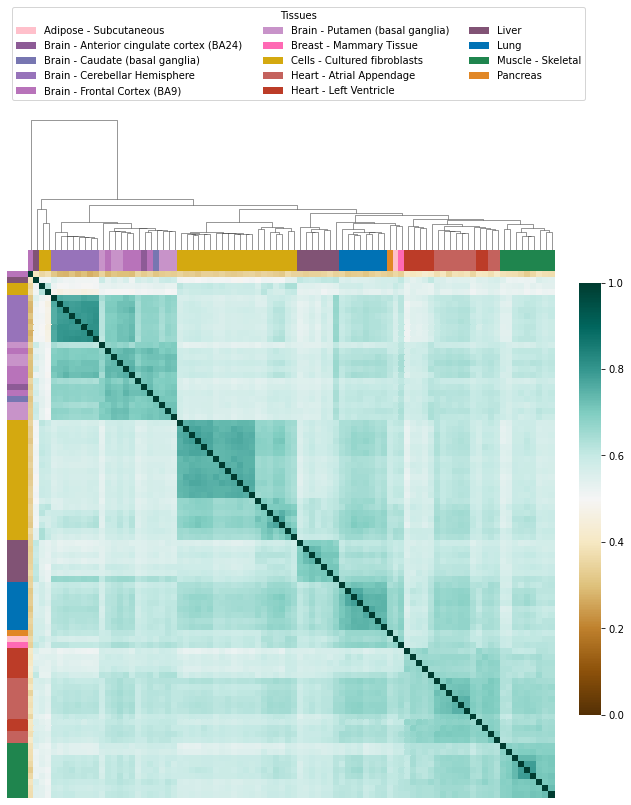

In [22]:
hierarchial_clustering_heatmap(novel_transcript_express_tissue_clean)

### Annotated Transcripts

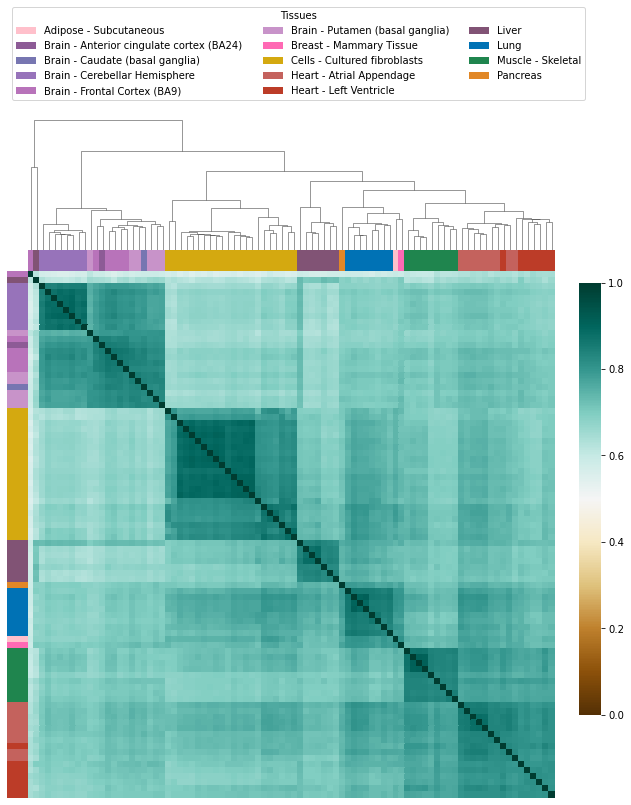

In [23]:
hierarchial_clustering_heatmap(annotated_transcript_express_tissue_clean)